In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

from MixtureModel import MixtureModel

%load_ext autoreload
%autoreload 2

import time as tm
from scipy.stats import truncnorm

In [2]:
import stat_utils as st
from cosmoHammer.ChainContext import ChainContext

In [39]:
name = '/archive1/users/grandis/DESY3_X_eRASS1/erass1_cl_v0.2.fits'

numz = 10

mapping = {'alpha_rnd':20, 'lam_med':21, 'alpha_cr':22, 'lns_intr':23, 'fudge':24}

for i in range(numz):
    mapping['frac_%i'%i] = i
    mapping['amp_z_%i'%i] = i+10

mm = MixtureModel(name, mapping=mapping)

4


In [40]:
print(mapping)

{'alpha_rnd': 20, 'lam_med': 21, 'alpha_cr': 22, 'lns_intr': 23, 'fudge': 24, 'frac_0': 0, 'amp_z_0': 10, 'frac_1': 1, 'amp_z_1': 11, 'frac_2': 2, 'amp_z_2': 12, 'frac_3': 3, 'amp_z_3': 13, 'frac_4': 4, 'amp_z_4': 14, 'frac_5': 5, 'amp_z_5': 15, 'frac_6': 6, 'amp_z_6': 16, 'frac_7': 7, 'amp_z_7': 17, 'frac_8': 8, 'amp_z_8': 18, 'frac_9': 9, 'amp_z_9': 19}


In [41]:
start = tm.time() 
mm.setup()
print(tm.time() -start)

17.084475994110107


In [42]:
fracs = 1./np.array([5.5, 4.8, 4.2, 4, 3.5, 3.2, 3, 2.5, 2, 1.5])
ampz = np.log(np.array([3.5, 2.3, 1.5, 1.3, 1., 0.9, 0.8, 0.72, 0.65, 0.5]))

others = np.array([0.4, np.log(2.2e1), 0.66, np.log(0.1), np.log(10**(1))])

p1 = np.hstack( (fracs, ampz, others) )

In [43]:
width = np.array(numz*[0.1,] + numz*[0.5,] + [0.2, 0.5, 0.1, 0.5, 0.5])

params = np.vstack( ( p1, p1-width, p1+width, 2*width ) ).T

In [44]:
print(params)

[[ 0.18181818  0.08181818  0.28181818  0.2       ]
 [ 0.20833333  0.10833333  0.30833333  0.2       ]
 [ 0.23809524  0.13809524  0.33809524  0.2       ]
 [ 0.25        0.15        0.35        0.2       ]
 [ 0.28571429  0.18571429  0.38571429  0.2       ]
 [ 0.3125      0.2125      0.4125      0.2       ]
 [ 0.33333333  0.23333333  0.43333333  0.2       ]
 [ 0.4         0.3         0.5         0.2       ]
 [ 0.5         0.4         0.6         0.2       ]
 [ 0.66666667  0.56666667  0.76666667  0.2       ]
 [ 1.25276297  0.75276297  1.75276297  1.        ]
 [ 0.83290912  0.33290912  1.33290912  1.        ]
 [ 0.40546511 -0.09453489  0.90546511  1.        ]
 [ 0.26236426 -0.23763574  0.76236426  1.        ]
 [ 0.         -0.5         0.5         1.        ]
 [-0.10536052 -0.60536052  0.39463948  1.        ]
 [-0.22314355 -0.72314355  0.27685645  1.        ]
 [-0.32850407 -0.82850407  0.17149593  1.        ]
 [-0.43078292 -0.93078292  0.06921708  1.        ]
 [-0.69314718 -1.19314718 -0.19

In [9]:
start = tm.time() 
L, pcont, pcl = mm.get_single_likes(p1)
print(tm.time() -start)

0.07983517646789551


/home/grandis/eROSITA/eRASS1/MixtureModel.py:117: RuntimeWarning: divide by zero encountered in log
  P_l_cont = params['alpha_rnd']*np.exp( np.interp( scaled_lam, self.lnl_cont_arr, np.log(self.P_lnl_cont_arr) ) )


In [10]:
start = tm.time() 
lnL = mm.getLike(p1)
print(tm.time() -start)
print(lnL)

0.01755666732788086
-13673.961700623002


In [11]:
print(np.where(~np.isfinite(L[mm.flag])))

(array([], dtype=int64),)


In [12]:
print(L[mm.flag])

[0.57178343 0.61296701 0.55529476 ... 0.41531865 0.48230266 0.70249598]


In [13]:
print( (pcont+pcl)[mm.flag] )

[1. 1. 1. ... 1. 1. 1.]


In [14]:
chain = st.CH_output('chains/mixture_model', 2, logging=False)
likes = np.genfromtxt('chains/mixture_modelprob.out')

In [15]:
print(chain.pos.shape)

(136750, 25)


In [16]:
i_maxl = np.argmax(likes)
print(likes[i_maxl])
print(chain.pos[i_maxl])

start = tm.time() 
L, pcont, pcl = mm.get_single_likes(chain.pos[i_maxl])
lnL_new = mm.getLike(chain.pos[i_maxl])
print(tm.time() -start)
print(lnL_new)

-11859.734581487943
[ 3.52747284e-02  2.09687211e-03  9.42921579e-03  3.58724027e-02
  2.49615448e-02  2.14099066e-02  6.29011694e-02  2.58636865e-01
  2.09001755e-01  5.37594124e-01  1.27086942e+00  7.43207337e-01
  5.01128494e-01  2.93478233e-01  1.61090563e-01  7.27621118e-02
  1.80431291e-01  5.57876484e-02 -2.67872976e-01 -8.38077933e-01
  3.71762931e-01  3.00938063e+00  5.22509202e-01 -6.80624252e-01
  8.45669698e-01]
0.03880882263183594
-11859.734581487943


In [17]:
print(np.mean(pcont[mm.flag]))

0.09123317116435303


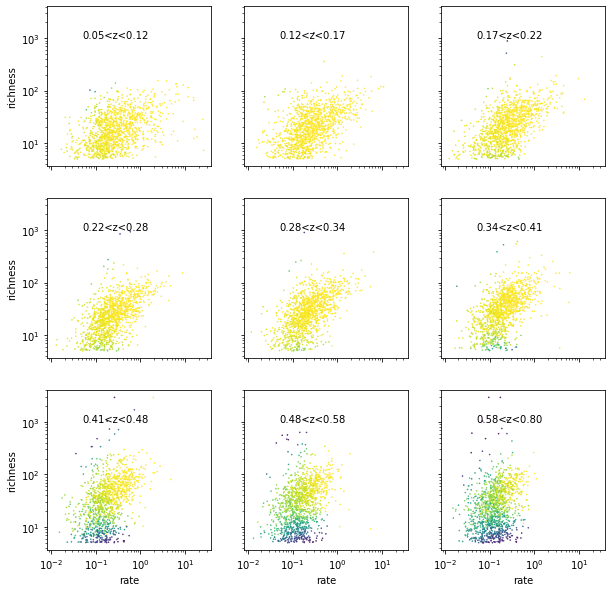

In [18]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

for i, ax in enumerate(axes.flatten()):
    in_bin = (mm.zbins[i]<mm.z) & (mm.z<mm.zbins[i+1]) & mm.flag
    
    ax.scatter(mm.rate[in_bin], mm.rich[in_bin], 
               s=0.3, c=pcl[in_bin], vmin=0, vmax=1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.05, 1e3, '%.2f<z<%.2f'%(mm.zbins[i], mm.zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('richness')
    if i>=6:
        ax.set_xlabel('rate')

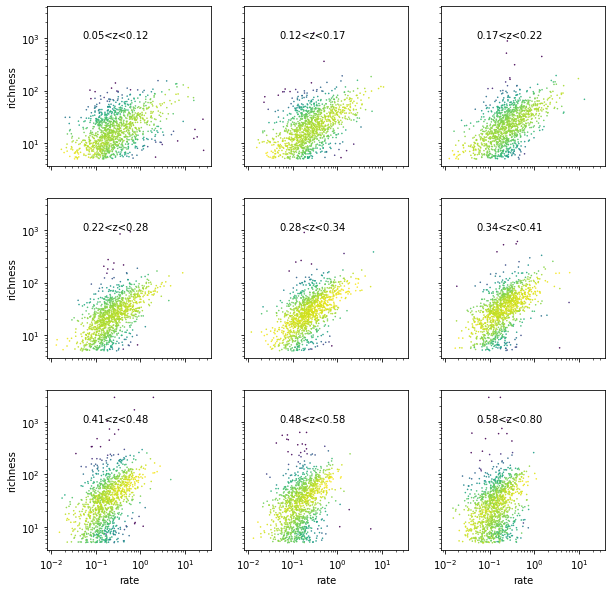

In [19]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

for i, ax in enumerate(axes.flatten()):
    in_bin = (mm.zbins[i]<mm.z) & (mm.z<mm.zbins[i+1]) & mm.flag
    
    ax.scatter(mm.rate[in_bin], mm.rich[in_bin], 
               s=0.3, c=L[in_bin], norm=LogNorm(vmin=0.01))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.05, 1e3, '%.2f<z<%.2f'%(mm.zbins[i], mm.zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('richness')
    if i>=6:
        ax.set_xlabel('rate')

In [20]:
brunin = 0

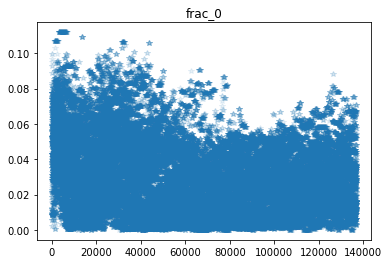

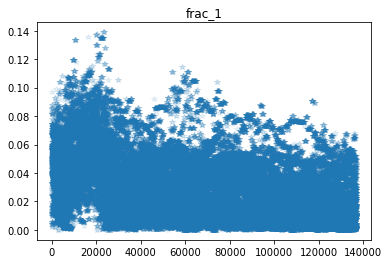

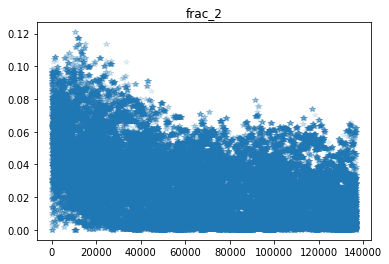

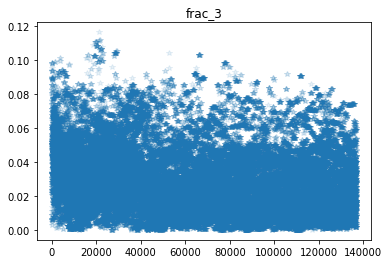

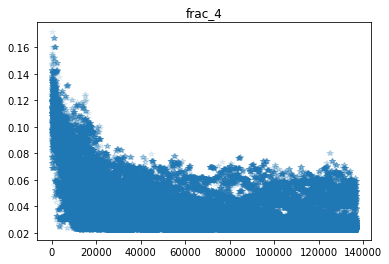

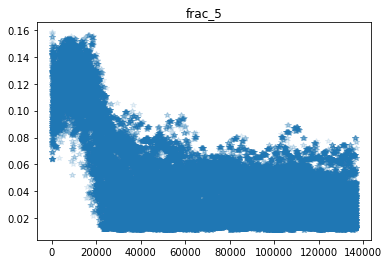

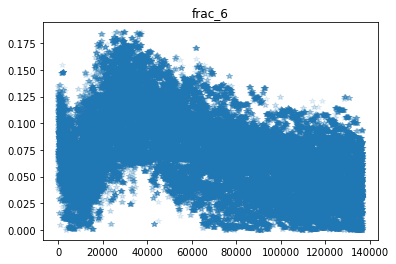

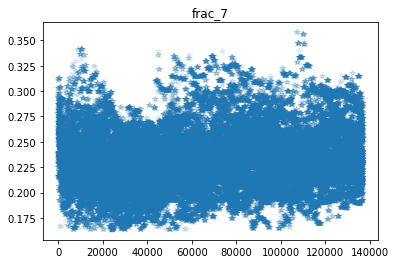

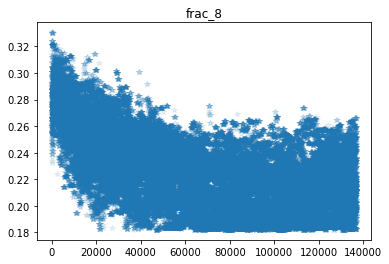

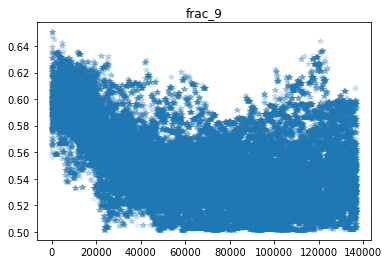

In [21]:
for i in range(10):
    plt.figure()
    for nn, kk in mapping.items():
        if kk==i:
            plt.title(nn)
    plt.plot(chain.pos[brunin:, i], '*', alpha=0.1)
    #plt.hist(chain.pos[brunin:, i])

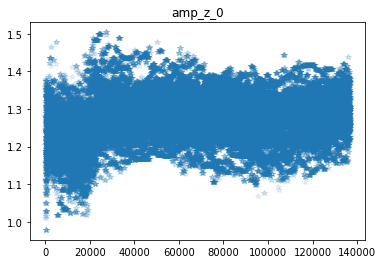

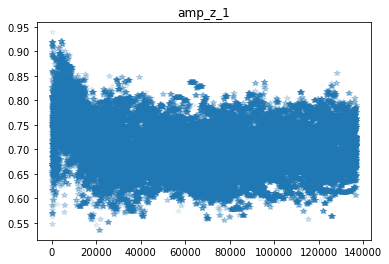

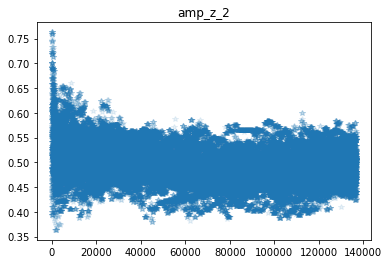

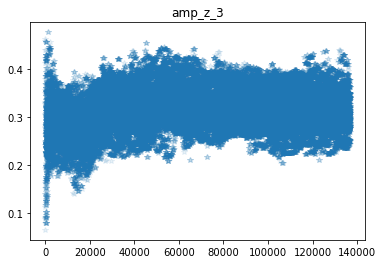

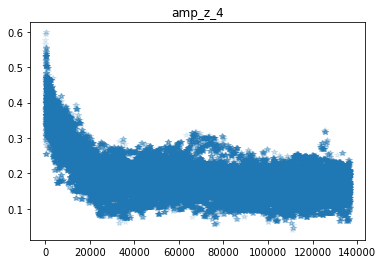

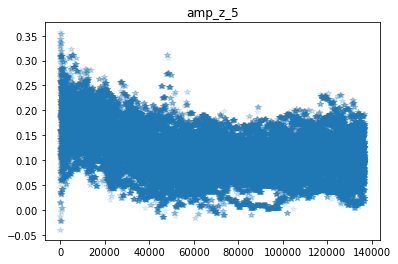

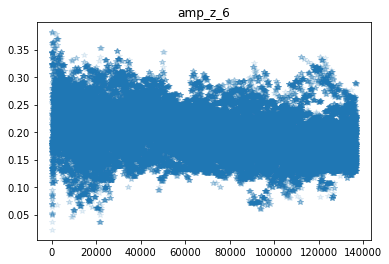

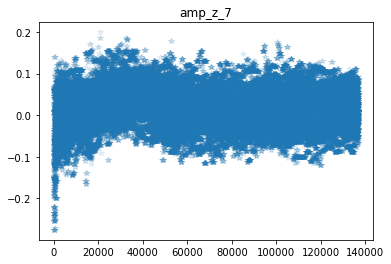

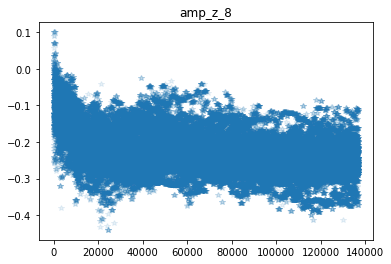

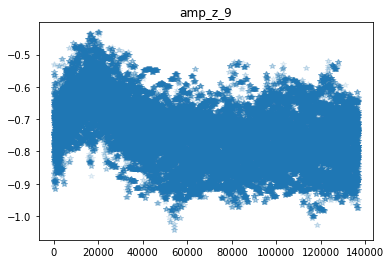

In [22]:
for i in range(10):
    plt.figure()
    for nn, kk in mapping.items():
        if kk==i+10:
            plt.title(nn)
    plt.plot(chain.pos[brunin:, i+10], '*', alpha=0.1)
    #plt.hist(chain.pos[brunin:, i+10])

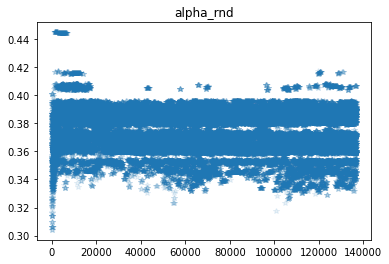

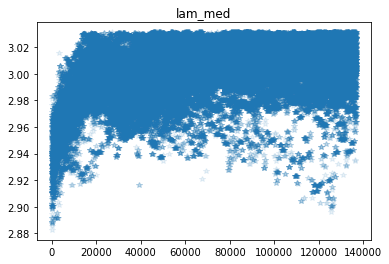

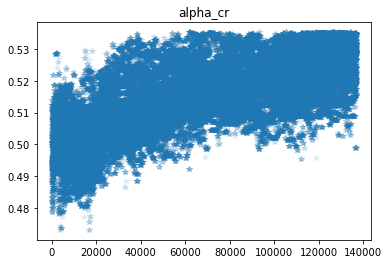

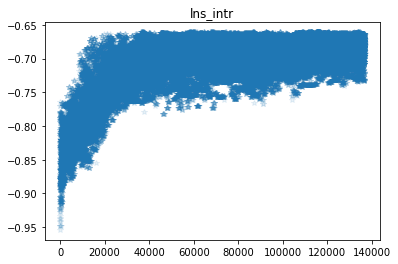

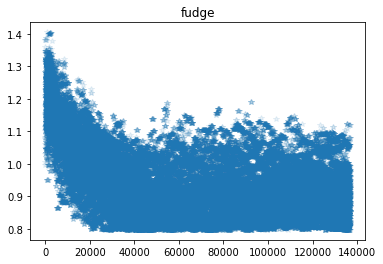

In [23]:
for i in range(5):
    plt.figure()
    for nn, kk in mapping.items():
        if kk==i+20:
            plt.title(nn)
    plt.plot(chain.pos[:, i+20], '*', alpha=0.1)
    #plt.hist(chain.pos[brunin:, i+20])

In [24]:
rng = np.random.default_rng(0)

In [25]:
fracs = 1./np.array([5.5, 4.8, 4.2, 4, 3.5, 3.2, 3, 2.5, 2, 1.5])
ampz = np.array([0, -.5, -.9, -1., 1., -1.1, -1.3, -1.6, -2, -2.5])

others = np.array([2, np.log(1.8e1), 0.5, np.log(0.1), np.log(10**(1))])

p1 = np.hstack( (fracs, ampz, others) )

params = mm._vec2params(p1)

In [26]:
pred_lam, var = mm.scaling_rel(params)

In [27]:
print(np.where(var<=0))
print(pred_lam[var<0])

(array([], dtype=int64),)
[]


(array([3866., 2558., 1588., 1237.,  983.,  881., 1018., 1320.,  837.,
         192.]),
 array([0.        , 0.09206726, 0.18413452, 0.27620178, 0.36826904,
        0.4603363 , 0.55240356, 0.64447082, 0.73653808, 0.82860535,
        0.92067261]),
 <BarContainer object of 10 artists>)

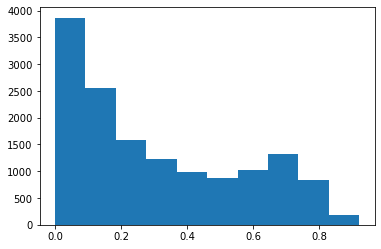

In [28]:
prior = mm.cont_prior(params)

plt.hist(prior)

In [29]:
lam_rl = np.zeros(len(mm.rich))

lam_rl[mm.flag] = np.array([truncnorm.rvs(np.log(mm.lam_min),
                                          np.log(1e4), 
                                          loc=ll, 
                                          scale=ss) for ll, ss in zip(np.log(pred_lam[mm.flag]),
                                                                      np.sqrt(var[mm.flag]))])

lam_rl = np.exp(lam_rl)

1.6094379124341003 1.6094379124341003 1.6094379124341003


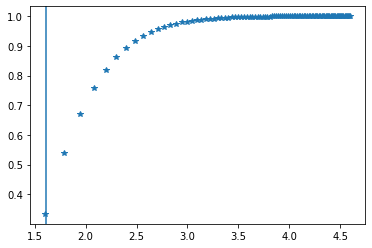

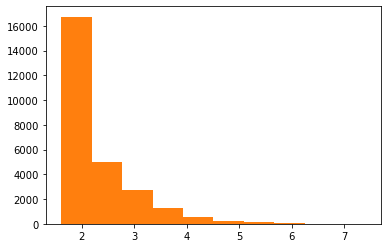

In [30]:
dP  = 0.5*(mm.lnl_cont_arr[1:]-mm.lnl_cont_arr[:-1])* \
                                          (mm.P_lnl_cont_arr[1:]+mm.P_lnl_cont_arr[:-1]) 

lc = 0.5*(mm.lnl_cont_arr[1:]+mm.lnl_cont_arr[:-1])

plt.plot(lc, np.cumsum(dP), '*')
plt.axvline(np.log(mm.lam_min))

lam_cont = np.interp(rng.uniform(size=len(lam_rl)), np.cumsum(dP), lc)
lam_cont -= np.amin(lam_cont) - np.log(mm.lam_min)

plt.figure()
_ = plt.hist(lam_cont)

lam_scale = params['alpha_rnd']*(lam_cont-np.log(mm.lam_min)) + np.log(mm.lam_min)

_ = plt.hist(lam_scale)

print(np.amin(lam_cont), np.amin(lam_scale), np.log(mm.lam_min))

In [31]:
lam = lam_rl.copy()
cont = (prior>rng.uniform(size=len(lam_rl)))
lam[cont] =  np.exp(lam_scale[cont])

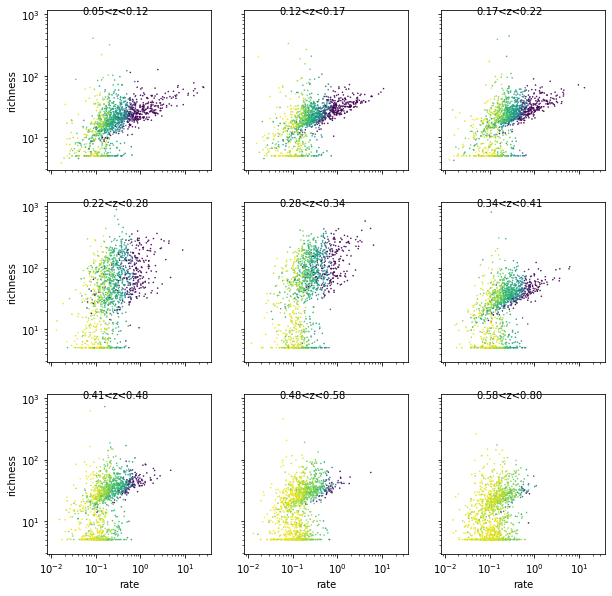

In [32]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

for i, ax in enumerate(axes.flatten()):
    in_bin = (mm.zbins[i]<mm.z) & (mm.z<mm.zbins[i+1]) & mm.flag
    
    ax.scatter(mm.rate[in_bin], lam[in_bin], 
               s=0.3, c=prior[in_bin], norm=LogNorm(vmin=0.01))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.05, 1e3, '%.2f<z<%.2f'%(mm.zbins[i], mm.zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('richness')
    if i>=6:
        ax.set_xlabel('rate')

In [33]:
def schechter(lams, alpha, lam_star):
    
    return 1./lam_star*(lams/lam_star)**alpha*np.exp(-lams/lam_star)

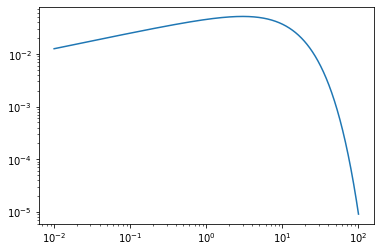

In [34]:
ll = np.logspace(-2, 2, num=1000)

schech = schechter(ll, 0.3, 10)
plt.plot(ll, schech)
plt.xscale('log')
plt.yscale('log')

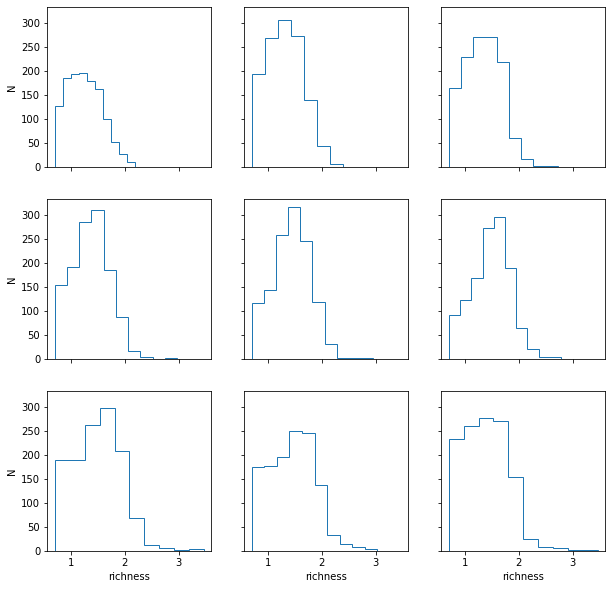

In [45]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

#means = np.array()

for i, ax in enumerate(axes.flatten()):
    in_bin = (mm.zbins[i]<mm.z) & (mm.z<mm.zbins[i+1]) & mm.flag
    
    #_ = ax.hist(np.log10(lam[in_bin]), histtype='step')
    _ = ax.hist(np.log10(mm.rich[in_bin]), histtype='step')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.text(0.05, 1e3, '%.2f<z<%.2f'%(mm.zbins[i], mm.zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('N')
    if i>=6:
        ax.set_xlabel('richness')